# Load Modules

In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare/ Collect Data

In [19]:
import os

In [31]:
path=os.listdir('Training/')

In [32]:
classes = { 'no_tumor':0, 'pituitary_tumor':1}

In [33]:
import cv2

In [34]:
X= []

In [35]:
Y= []

In [36]:
for cls in classes:
    pth='Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [37]:
np.unique(Y)

array([0, 1])

In [38]:
X= np.array(X)
Y= np.array(Y)

In [39]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [40]:
X.shape

(1222, 200, 200)

# Visualize data

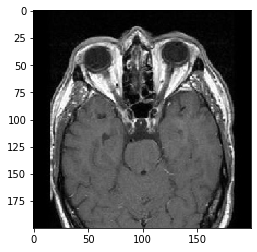

In [41]:
plt.imshow(X[0], cmap='gray')

# Prepare data

In [42]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

# Split Data

In [43]:
   xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [44]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

# Feature Scaling

In [45]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest =xtest/255


255 0
255 0


In [46]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

1.0 0.0
1.0 0.0


# Feature selection: PCA

In [47]:
 #i dont want to use pca if you want then remove comment accordingly

In [48]:
 from sklearn.decomposition import PCA

In [49]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.trasform(xtest)

pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [50]:
#print(pca_train.shape, pca_test.shape)
#print(pca.n_compponents_)
#print(pca.n_features_)

# Train Model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [54]:
import warnings
warnings.filterwarnings('ignore')
lg= LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
sv=SVC() #rbf kernel used for this kinda data perform  really good
sv.fit(pca_train, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 # Evaluation

In [56]:
print("Training score:", lg.score(pca_train, ytrain))
print("Testing score:", lg.score(pca_test, ytest))

Training score: 1.0
Testing score: 0.9591836734693877


In [57]:
print("Training score:", sv.score(pca_train, ytrain))
print("Testing score:", sv.score(pca_test, ytest))

Training score: 0.9938587512794268
Testing score: 0.963265306122449


In [58]:
  #seems bettr than logist

# Prediction

In [59]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [60]:
pred[36]

0

In [67]:
ytest[36]

1

# Test Model

In [62]:
dec ={0:'No Tumor', 1:'Positive Tumor'}

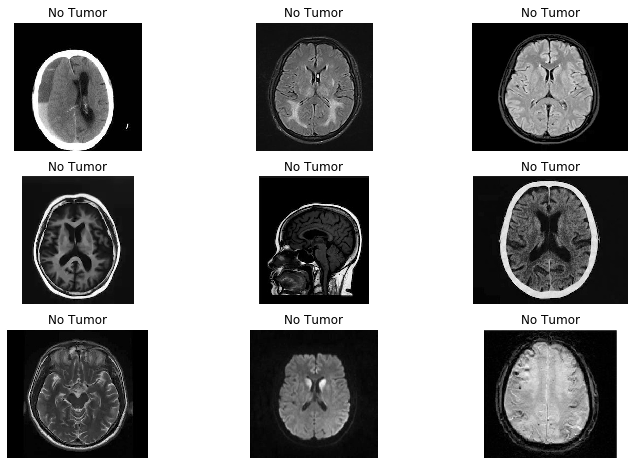

In [64]:
plt.figure(figsize=(12,8))
p = os.listdir('Testing/')
c=1
for i in os.listdir('Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img=cv2.imread('Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1=img1.reshape(1,-1)/255
    p= sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1  

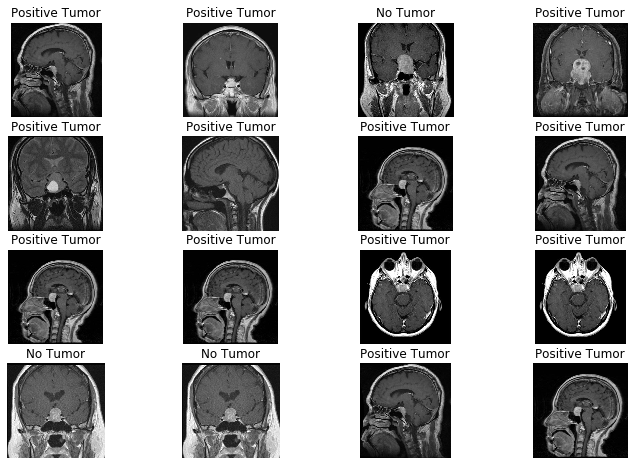

In [68]:
plt.figure(figsize=(12,8))
p = os.listdir('Testing/')
c=1
for i in os.listdir('Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img=cv2.imread('Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1=img1.reshape(1,-1)/255
    p= sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1  